In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lesson 4
## Kalman Filters
One use of Kalman Filters below is for predicting the next location of a car and its inferred velocity from the positions at time t and t-1, t+1, etc.

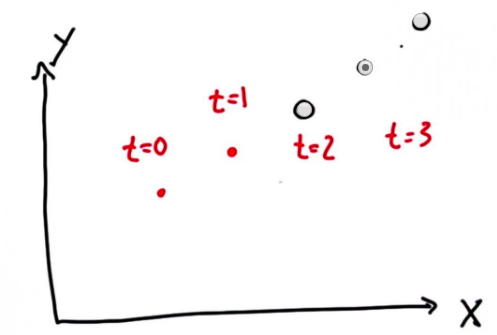

## evaluate Gaussian

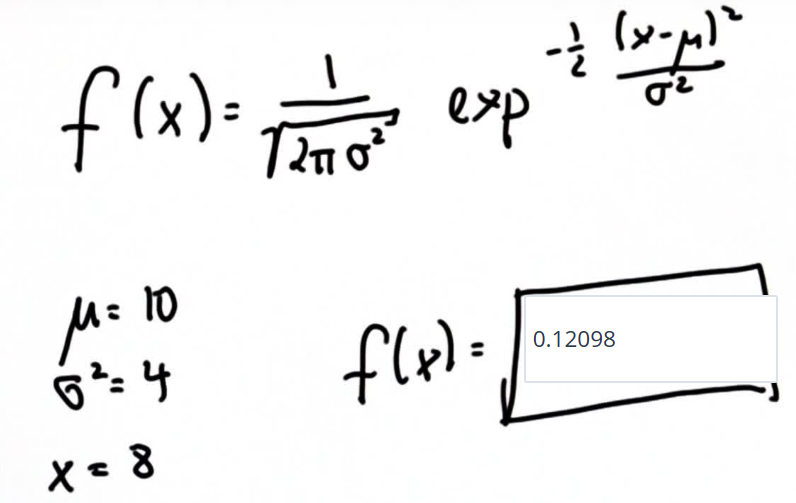

In [2]:
#For this problem, you aren't writing any code.
#Instead, please just change the last argument 
#in f() to maximize the output.

from math import *

def f(mu, sigma2, x):
    return 1/sqrt(2.*pi*sigma2) * exp(-.5*(x-mu)**2 / sigma2)

print(f(10.,4.,10.)) #Change the 8. to something else!


0.19947114020071635


## Kalman filter updates measurements and motions
Just like in localization but math is slightly different

## convolution vs product
In the previous lesson, performing a measurement meant updating our belief by a multiplicative factor, while moving involved performing a convolution.

## update mean and variance given prior and new measurement
below we have mu' and sigma^2' which are calculated from mu, v, sigma^2, r^2.   

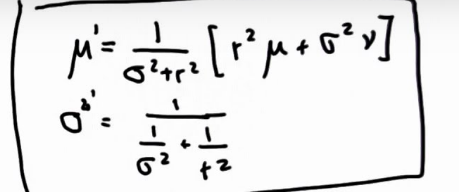

In [4]:
# Write a program to update your mean and variance
# when given the mean and variance of your belief
# and the mean and variance of your measurement.
# This program will update the parameters of your
# belief function.

def update(mean1, var1, mean2, var2):
    new_mean =(1/(var1 + var2)) * (var2*mean1 + var1*mean2)
    new_var = 1/((1/var1) + (1/var2))
    return [new_mean, new_var]

print (update(10.,8.,13., 2.))

[12.4, 1.6]


## motion update is much simpler
mean_new = mean_old + move

sigma^2_new = sigma^2_old + sigma^2_move


In [6]:
# Write a program that will predict your new mean
# and variance given the mean and variance of your 
# prior belief and the mean and variance of your 
# motion. 

def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

print(predict(10., 4., 12., 4.))

[22.0, 8.0]


## Write a program that will iteratively update and predict based on the location measurements and inferred motions shown below. 

In [12]:
def update(mean1, var1, mean2, var2):
    new_mean = float(var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1./(1./var1 + 1./var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

#location measurements
measurements = [5., 6., 7., 9., 10.]
#actual or inferred motion
motion = [1., 1., 2., 1., 1.]
#sigmas for measurements and motions
measurement_sig = 4.
motion_sig = 2.
#starting mu and sigmas
'''
so this first measurement of mu at 0 is WRONG, it should be 5, the first element of measurements[]
'''
mu = 0.
#sig = 10000.
''' 
at a very low uncertainty level to start, we get some correction of the sigma but the final prediction
ends at 10.5 rather than almost 11 meaning some inaccuracy remains in the system because the initial 
false belief has a very strong weight but what if we iterate more times, will we eventually get back???
'''
sig = 0.0000000001

#Please print out ONLY the final values of the mean
#and the variance in a list [mu, sig]. 
# Insert code here
new_mu, new_sig = 0.,0.

# for experiment on more iterations balancing out bad original guess
count = 0
#for i in range(len(measurements)):
for i in range(10000):
    count = i % len(measurements)
    if i==0:
        [mu, sig] = [0.,10000.]
        new_mu, new_sig = update(mu, sig, measurements[i], measurement_sig)
        print("update: mu {}, sig {}".format(new_mu, new_sig))
        new_mu, new_sig = predict(new_mu, new_sig, motion[i], motion_sig)
        print("predict: mu {}, sig {}".format(new_mu, new_sig))
    else:
        new_mu, new_sig = update(new_mu, new_sig, measurements[count], measurement_sig)
        print("update: mu {}, sig {}".format(new_mu, new_sig))
        new_mu, new_sig = predict(new_mu, new_sig, motion[count], motion_sig)
        print("predict: mu {}, sig {}".format(new_mu, new_sig))

mu = new_mu
sig = new_sig
print ([mu, sig])


update: mu 4.998000799680128, sig 3.9984006397441023
predict: mu 5.998000799680128, sig 5.998400639744102
update: mu 5.999200191953932, sig 2.399744061425258
predict: mu 6.999200191953932, sig 4.399744061425258
update: mu 6.999619127420922, sig 2.0951800575117594
predict: mu 8.999619127420921, sig 4.09518005751176
update: mu 8.999811802788143, sig 2.0235152416216957
predict: mu 9.999811802788143, sig 4.023515241621696
update: mu 9.999906177177365, sig 2.0058615808441944
predict: mu 10.999906177177365, sig 4.005861580844194
update: mu 7.997756639476994, sig 2.0014643223056017
predict: mu 8.997756639476993, sig 4.001464322305601
update: mu 7.498604014827724, sig 2.0003660135811687
predict: mu 8.498604014827723, sig 4.000366013581169
update: mu 7.749267727143355, sig 2.000091499209048
predict: mu 9.749267727143355, sig 4.000091499209049
update: mu 9.37462957878291, sig 2.0000228745406368
predict: mu 10.37462957878291, sig 4.000022874540637
update: mu 10.187314253800515, sig 2.000005718618

predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194

update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388

predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194

predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774,

update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194,

predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, 

predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774,

update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, s

predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, 

predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, 

predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194

update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, sig 4.0
update: mu 9.387096774193548, sig 2.0
predict: mu 10.387096774193548, sig 4.0
update: mu 10.193548387096774, sig 2.0
predict: mu 11.193548387096774, sig 4.0
update: mu 8.096774193548388, sig 2.0
predict: mu 9.096774193548388, sig 4.0
update: mu 7.548387096774194, sig 2.0
predict: mu 8.548387096774194, sig 4.0
update: mu 7.774193548387097, sig 2.0
predict: mu 9.774193548387096, s

## final result of 10.99 is almost final measurement of 10 + final_motion of 1 = 11
## last sigma after a measurement is about 2 and after motion is about 4

# Intuitive explanation of location and velocity with Kalman Filters
## below there is X dot axis for velocity and X for location
location at t+1 can be inferred by location at t if velocity is given.
The purple Gaussian is at t=1 so velocity is unknown.  But given velocity=1 at t=1, we know location at t=2 is 2 and if velocity at t=1 is 2, next location is 3.  Thus we get the red diagonal Gaussian, the prior.
Then a measurement is taken at t=2 which is the green so we get a diagonal elliptical Gaussian at (2,1)=(location=2, velocity=1) and at (3,2) and (4,3).  Ie. next location is further if velocity at t=1 is higher.


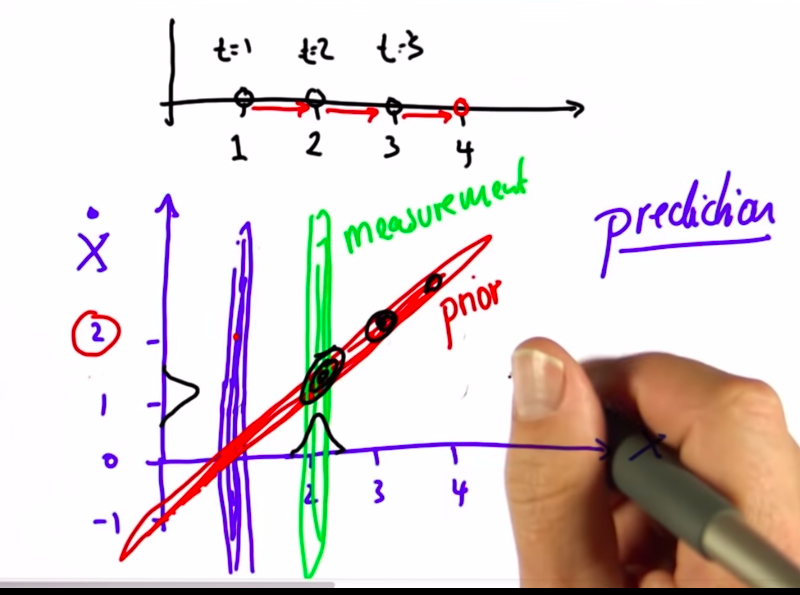

x' = x + x_dot meaning subsequent observations give us info about hidden variables.

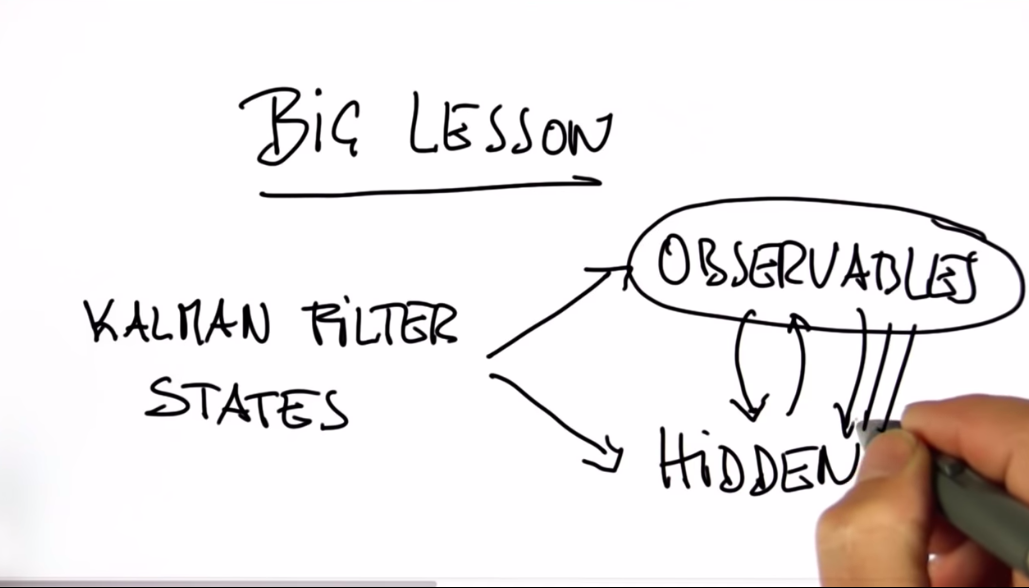

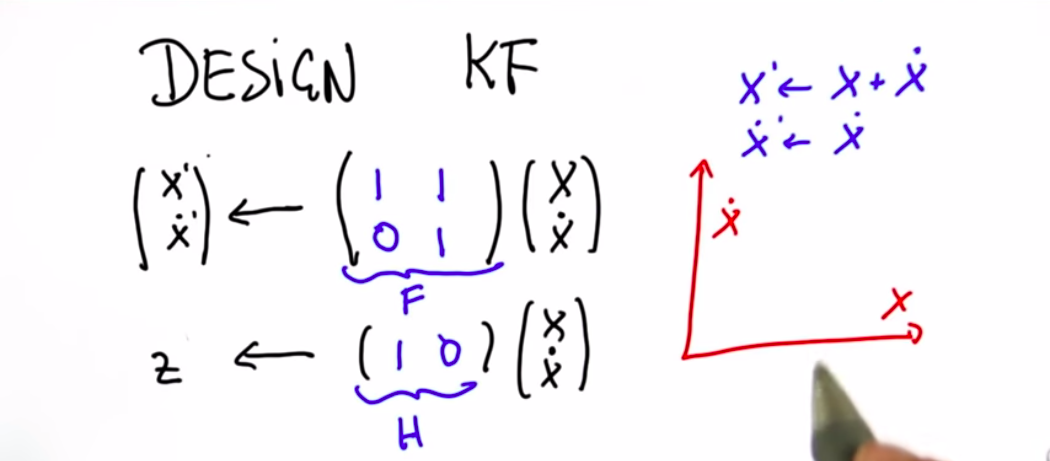

## above equations
velocity x_dot did not change so matrix (x, x_dot) is updated.  

In [17]:
# Write a function 'kalman_filter' that implements a multi-
# dimensional Kalman Filter for the example given

from math import *


class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        #value is a 2D array
        self.value = value
        self.dimx = len(value) # num rows
        self.dimy = len(value[0]) # num cols
        if value == [[]]: 
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise ValueError("Invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise ValueError ("Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print(self.value[i])
        print(' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError ("Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError ("Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise ValueError ("Matrices must be m*n and n*p to multiply")
        else:
            # multiply if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise ValueError ("Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                try:
                   res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
                except:
                   raise ValueError ("Zero diagonal")
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)


########################################

# Implement the filter function below


def kalman_filter(x, P):
    for n in range(len(measurements)):
        
        # measurement update
        z = matrix([[measurements[n]]])
        y = z - (H.__mul__(x))
        S = (H.__mul__(P)).__mul__(H.transpose()) + R
        K = (P.__mul__(H.transpose())).__mul__(S.inverse())
        x = x + (K.__mul__(y))
        P = (I - (K.__mul__(H))).__mul__(P)
        # prediction
        # F matrix * location + motion vector
        x = F.__mul__(x) + u
        # update uncertainty matrix 
        P = (F.__mul__(P)).__mul__(F.transpose())
        
        print('x= \n {}'.format(x.show()))
        print('P= \n {}'.format(P.show()))
        
    return x,P

############################################
### use the code below to test your filter!
############################################
# sequence of position estimates
measurements = [1, 2, 3]

# initial state (location and velocity)
x = matrix([[0.], [0.]])
# initial uncertainty
P = matrix([[1000., 0.], [0., 1000.]]) 
# external motion (motion vector)
u = matrix([[0.], [0.]]) 
#updating matrices for measurement and motion
# next state function (state transition matrix)
F = matrix([[1., 1.], [0, 1.]])
# measurement function ()
H = matrix([[1., 0.]])
# measurement uncertainty
R = matrix([[1.]]) 
# identity matrix
I = matrix([[1., 0.], [0., 1.]]) 

# error term for measurement update
y = 0
'''
Map error term y into matrix S obtained by projecting system uncertainty into measurement space using 
measurement function projection
'''
S = 0
'''
map S into Kalman gain K
'''
K = 0
final_x, final_P = 0,0
final_x, final_P = kalman_filter(x,P)
print("x {} \n P {}".format(final_x, final_P))
#print(kalman_filter(x, P))
# output should be:
# x: [[3.9996664447958645], [0.9999998335552873]]
# P: [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]


[0.9990009990009988]
[0.0]
 
x= 
 None
[1000.9990009990012, 1000.0]
[1000.0, 1000.0]
 
P= 
 None
[2.998002993017953]
[0.9990019950129659]
 
x= 
 None
[4.990024935169789, 2.9930179531228447]
[2.9930179531228305, 1.9950129660888933]
 
P= 
 None
[3.9996664447958645]
[0.9999998335552873]
 
x= 
 None
[2.3318904241194827, 0.9991676099921091]
[0.9991676099921067, 0.49950058263974184]
 
P= 
 None
x [[3.9996664447958645], [0.9999998335552873]] 
 P [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]


more Kalman filter lectures online at http://www.ilectureonline.com/lectures/subject/SPECIAL%20TOPICS/26/190